In [4]:
##############################################################################
import sys
path = "C:\\Users\\Paul Valcke\\Documents\\GitHub\\GEMMES" 
sys.path.insert(0, path)
import pygemmes as pgm
import numpy as np

from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True)
#%matplotlib widget

from IPython.display import display,HTML,Markdown
from IPython.display import IFrame

opt.columnDefs = [{"className": "dt-left", "targets": "_all"}]
opt.classes="display nowrap compact"
opt.scrollY="400px"
opt.scrollCollapse=True
opt.paging=False
##############################################################################

<IPython.core.display.Javascript object>

The following fields are defined in the model but not it the library :
	- differential: ['debt']
	- parameter: ['rho']
The following fields are identified as parameters :
	- independant : ['alpha', 'nu', 'delta', 'r', 'Delta', 'n', 'k0', 'k1', 'gamma']
	- function of other parameters : []
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : []
The following order has been determined for functions:
	- parameter: ['nt']
	- statevar: ['beta', 'pi', 'kappa', 'Phillips']
	- differential: ['omega', 'employment', 'debt', 'time']

time step 1000 / 1000


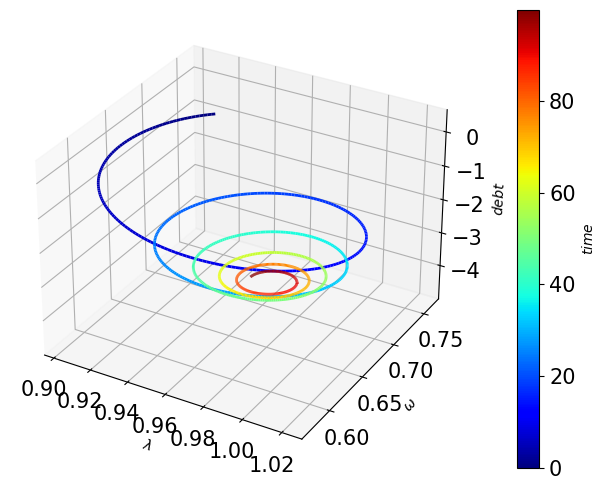

Done


In [5]:
hub=pgm.Hub('reduced_GK_FRED',preset='FredValues')
#hub
hub.set_dparam(**{'dt':0.01})
hub.run()
pgm.plots.XYZ(hub,'employment','omega','debt')
#display(*hub.get_summary())

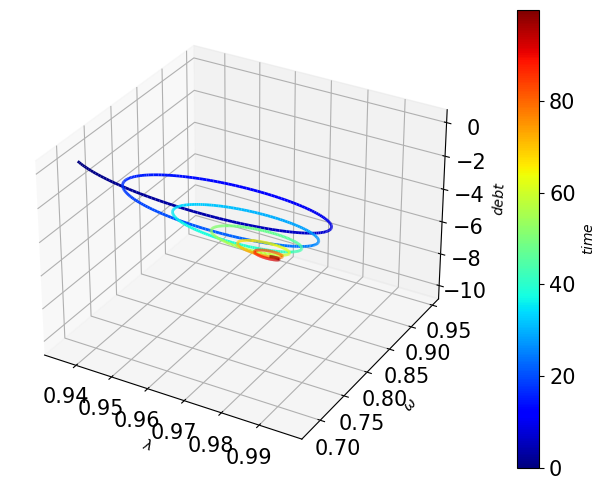

Done


In [ ]:
pgm.get_available_models()

In [ ]:
Markdown(pgm.get_available_model_documentation('CHIMES'))

In [ ]:
hub=pgm.Hub('CHIMES0',preset='SimpleTri',verb=True)
hub.set_dparam(**{'Tmax':10,'dt':0.01})
hub.run()
hub.plot()

In [ ]:
display(*hub.get_summary())

In [ ]:
hub.get_fieldsproperties()

In [ ]:
R=hub.dparam['nu0']
R

In [ ]:
#plt.close('all')
sectors = hub.dparam['Nprod']['list']
for sector in sectors :
    pgm.plots.plotnyaxis(hub, y=[[['inflation', sector],
                                  ['inflationMarkup', sector],
                                  ['inflationdotV', sector], ],
                                 [['dotV',sector]],
                                 [['c',sector],
                                  ['p',sector]],
                                 [['pi',sector],
                                  ['kappa',sector]],
                                 [['employment',sector],
                                  ['u',sector],
                                  ]],)
    pgm.plots.repartition(hub,
                          ['pi','omega','Mxi','Mgamma','rd','reloverinvest','reldotv'],
                          sign= [1,1,1,1,1,1,-1],
                          sector=sector,
                          title=f'Expected relative budget $\pi$ for sector {sector}')
    pgm.plots.repartition(hub,['Minter','Minvest','C','dotV'],
                          ref='Y',
                          sector=sector,
                          title=f'Physical Fluxes for sector {sector}')
    pgm.plots.repartition(hub,['MtransactY','MtransactI','wL','pC','rD'],
                          sign=[1, 1, 1, -1, 1],
                          ref='dotD',
                          sector=sector,
                          title=f'Monetary Fluxes for sector {sector}',
                          removetranspose=True)

In [ ]:
sectors = hub.dparam['Nprod']['list']
pgm.plots.plotnyaxis(hub,y=[#['employmentAGG']+[['employment',sector] for sector in sectors],
                            [['omega',sector] for sector in sectors],
                            [['pi',sector] for sector in sectors],
                            [['gamma',sector] for sector in sectors],
                            [['xi',sector] for sector in sectors],
                            [['rd',sector] for sector in sectors],
                            #[['inflation',sector] for sector in sectors],
                            #[['d',sector] for sector in sectors],
                            ],
                            tini=40,
                            tend=50,
                            title='All',
                            loc='upper left')

In [ ]:


for sector in sectors:
    pgm.plots.plotnyaxis(hub,y=[[['inflation', sector],
                                ['inflationMarkup', sector],
                                ['inflationdotV', sector], ],
                                [['dotV',sector]],
                                [['V',sector]],
                                #[['u',sector]],
                                ],
                                tini=80,tend=100,
                                title=sector)

In [ ]:
hub=pgm.Hub('CHIMES0')
hub.set_preset('SimpleTri')
hub.run()


In [ ]:
hub.run()

# STARTING AS A GOODWIN

In [ ]:
hub=pgm.Hub('CHIMES0')
GOODWIN_PRESET= { 
    ###
    'Tmax':100, 
    'Tini':0, 
    'dt': 0.01, 
    'Nprod': [''], 
    'nx': [''], 
    'nr': [''],

    'alpha':0.025, 
    'n':0.02, 
    'delta':0.005, 

    'gammai':0,
    'r':0.03, 
    'phinull':0.1, 

    'Xi': 1, 
    'Gamma': 0.1, 
    'sigma': 1, 
    'z' :1, 
    'b' :1, 
    'nu0': 3, 
    'eta': 0, 
    'mu0': 1, 
    'chi': 0, 
    'Cpond': 1, 
    'Delta': 0, 
    'philinConst': -0.292, 
    'philinSlope':  0.469, 
    #'phinull':0.1,
    'k0':1,

    'D':0, 
    'Dh':0, 
    'V':1, 
    'K':2, 
    'p':1, 
    'w0':0.7, 
    'u0':1, 
    'a0':3, 
    'N':1, 
}
hub=pgm.Hub('CHIMES0')
hub.set_dparam(**GOODWIN_PRESET,verb=False)
hub.run()

In [ ]:
hub.plot(filters_key=['employment','omega','gamma','xi','rd','pi',
                      'C','Ir','Y','GammaY','dotV',],
         separate_variables={'':'employment'}) #
pgm.plots.XY(hub,'omega','employment',color='time')
    

## Injecting Inflation

In [ ]:
hub=pgm.Hub('CHIMES0',verb=False)
hub.set_dparam(**GOODWIN_PRESET,verb=False)
hub.set_dparam(**{'mu0':1.5,
                  'eta':0.1})
hub.run()

In [ ]:
hub.plot(filters_key=['employment','omega','gamma','xi','rd','pi',
                      'C','Ir','Y','GammaY','dotV','p','c','inflation','mu','Phillips'],
         separate_variables={'':'mu'}) #
pgm.plots.XY(hub,'omega','employment',color='time')

## Getting into GOODWIN-KEEN 

$C:=Y(1-\Gamma)-I $

$C=Y(1-\Gamma- \kappa(\pi) - \xi)$

On Goodwin-Keen approach.

With Ponderation of income : 
$C= C^{pond}(wL/p)$

$C= C^{pond} Y \omega$

Having both induces : $C^{pond} =\dfrac{1- \kappa(\pi) - \xi-\Gamma}{ \omega}$


In [ ]:
hub=pgm.Hub('CHIMES0',verb=False)
hub.set_dparam(**GOODWIN_PRESET,verb=False)
hub.set_dparam(**{'k0':1,})
hub.run()


In [ ]:
hub.plot(filters_key=['employment','omega','gamma','xi','rd','pi','kappa','rd',
                      'C','Ir','Y','GammaY','dotV','p','c','inflation','mu','Phillips','D','Cpond','dotV'],
         separate_variables={'':['Cpond','kappa','pi']}) 
pgm.plots.XYZ(hub,'omega','employment','rd',color='time')